# Task 1: Use NLP techniques to analyze a collection of texts


## 0.1 Manual

For the use of the code on your dataset simply change the filename in the variable "datafile" make shure your dataframe is in a csv format or change the way of loading it in to the code. In the EDA Process you need to rename the manipulated rows ("reviewText"). It is recommend to install the requirements in the repository. It is also recommend to create a virutal enviroment. Here is a useful link to help you get started https://towardsdatascience.com/creating-and-using-virtual-environment-on-jupyter-notebook-with-python-db3f5afdd56a Have fun!

## 1. Exploratory Data Analysis
As usual, let´s start with some basic exploratory analysis.

1.1 Loading Modules

In [16]:
#pip install --user ipykernel
#python -m ipykernel install --user --name=myenv
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb
import statistics
from wordcloud import WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
from warnings import filterwarnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from PIL import Image
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud


output_notebook()

%matplotlib inline

Loading BokehJS ...

1.2 Loading the raw dataset

In [17]:
datafile = '/kaggle/input/amazon-music-reviews/Musical_instruments_reviews.csv'
raw_data = pd.read_csv(datafile, parse_dates=[8])

1.3 Describe the raw dataset

In [18]:
print('There are {} rows and {} columns in test'.format(raw_data.shape[0],raw_data.shape[1]))

There are 10261 rows and 9 columns in test


In [19]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   reviewerID      10261 non-null  object        
 1   asin            10261 non-null  object        
 2   reviewerName    10234 non-null  object        
 3   helpful         10261 non-null  object        
 4   reviewText      10254 non-null  object        
 5   overall         10261 non-null  float64       
 6   summary         10261 non-null  object        
 7   unixReviewTime  10261 non-null  int64         
 8   reviewTime      10261 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 721.6+ KB


In [20]:
raw_data['overall'].describe()

count    10261.000000
mean         4.488744
std          0.894642
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: overall, dtype: float64

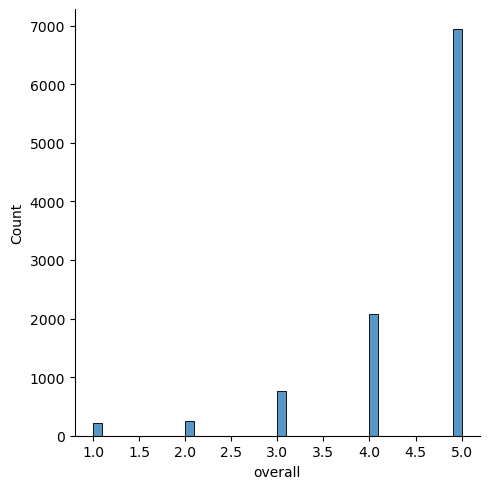

In [21]:
sns.displot(raw_data, x="overall")

1.4 Basic EDA

In [22]:
#Method 1: Remove Punctuation, more precise find word charakter and remove whitespace charakter
#raw_data['reviewText'] = raw_data['reviewText'].str.replace('[^\w\s]', '')
#raw_data.head(10)

#Method 2:
raw_data['reviewText'] = raw_data['reviewText'].str.replace(r'[^\w\s]+', ' ')
raw_data.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",Not much to write about here but it does exac...,5.0,good,1393545600,2014-02-28
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,2013-03-16
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,2013-08-28
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,2014-02-14
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,2014-02-21
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",So good that I bought another one Love the h...,5.0,The Best Cable,1356048000,2012-12-21
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]",I have used monster cables for years and with...,5.0,Monster Standard 100 - 21' Instrument Cable,1390089600,2014-01-19
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",I now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,1353024000,2012-11-16
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",Perfect for my Epiphone Sheraton II Monster ...,5.0,Great cable,1215302400,2008-07-06
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",Monster makes the best cables and a lifetime w...,5.0,Best Instrument Cables On The Market,1389139200,2014-01-08


In [23]:
#Remove Digits (\w contains a-z, A-Z, 0-9)
raw_data['reviewText'] = raw_data['reviewText'].str.replace('\d', '')
raw_data.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",Not much to write about here but it does exac...,5.0,good,1393545600,2014-02-28
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,2013-03-16
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,2013-08-28
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,2014-02-14
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,2014-02-21
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",So good that I bought another one Love the h...,5.0,The Best Cable,1356048000,2012-12-21
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]",I have used monster cables for years and with...,5.0,Monster Standard 100 - 21' Instrument Cable,1390089600,2014-01-19
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",I now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,1353024000,2012-11-16
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",Perfect for my Epiphone Sheraton II Monster ...,5.0,Great cable,1215302400,2008-07-06
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",Monster makes the best cables and a lifetime w...,5.0,Best Instrument Cables On The Market,1389139200,2014-01-08


In [24]:
#lower text
raw_data["reviewText"] = raw_data["reviewText"].str.lower()
raw_data.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",not much to write about here but it does exac...,5.0,good,1393545600,2014-02-28
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",the product does exactly as it should and is q...,5.0,Jake,1363392000,2013-03-16
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",the primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,2013-08-28
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",nice windscreen protects my mxl mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,2014-02-14
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",this pop filter is great it looks and perform...,5.0,No more pops when I record my vocals.,1392940800,2014-02-21
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",so good that i bought another one love the h...,5.0,The Best Cable,1356048000,2012-12-21
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]",i have used monster cables for years and with...,5.0,Monster Standard 100 - 21' Instrument Cable,1390089600,2014-01-19
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",i now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,1353024000,2012-11-16
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",perfect for my epiphone sheraton ii monster ...,5.0,Great cable,1215302400,2008-07-06
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",monster makes the best cables and a lifetime w...,5.0,Best Instrument Cables On The Market,1389139200,2014-01-08


In [25]:
#remove stopwords
sw = stopwords.words('english')
raw_data['reviewText'] = raw_data['reviewText'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
raw_data.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",much write exactly supposed filters pop sounds...,5.0,good,1393545600,2014-02-28
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",product exactly quite affordable realized doub...,5.0,Jake,1363392000,2013-03-16
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",primary job device block breath would otherwis...,5.0,It Does The Job Well,1377648000,2013-08-28
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",nice windscreen protects mxl mic prevents pops...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,2014-02-14
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",pop filter great looks performs like studio fi...,5.0,No more pops when I record my vocals.,1392940800,2014-02-21
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",good bought another one love heavy cord gold c...,5.0,The Best Cable,1356048000,2012-12-21
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]",used monster cables years good reason lifetime...,5.0,Monster Standard 100 - 21' Instrument Cable,1390089600,2014-01-19
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",use cable run output pedal chain input fender ...,3.0,Didn't fit my 1996 Fender Strat...,1353024000,2012-11-16
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",perfect epiphone sheraton ii monster cables we...,5.0,Great cable,1215302400,2008-07-06
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",monster makes best cables lifetime warranty do...,5.0,Best Instrument Cables On The Market,1389139200,2014-01-08


In [26]:
#lemmatize
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

raw_data['reviewText'] = raw_data['reviewText'].apply(lambda text: lemmatize_words(text))
raw_data.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",much write exactly suppose filter pop sound re...,5.0,good,1393545600,2014-02-28
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",product exactly quite affordable realize doubl...,5.0,Jake,1363392000,2013-03-16
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",primary job device block breath would otherwis...,5.0,It Does The Job Well,1377648000,2013-08-28
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",nice windscreen protects mxl mic prevents pops...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,2014-02-14
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",pop filter great look performs like studio fil...,5.0,No more pops when I record my vocals.,1392940800,2014-02-21
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",good buy another one love heavy cord gold conn...,5.0,The Best Cable,1356048000,2012-12-21
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]",use monster cable year good reason lifetime wa...,5.0,Monster Standard 100 - 21' Instrument Cable,1390089600,2014-01-19
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",use cable run output pedal chain input fender ...,3.0,Didn't fit my 1996 Fender Strat...,1353024000,2012-11-16
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",perfect epiphone sheraton ii monster cable wel...,5.0,Great cable,1215302400,2008-07-06
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",monster make best cable lifetime warranty does...,5.0,Best Instrument Cables On The Market,1389139200,2014-01-08


In [27]:
reindexed_data = raw_data['reviewText']
reindexed_data.head(20)

0     much write exactly suppose filter pop sound re...
1     product exactly quite affordable realize doubl...
2     primary job device block breath would otherwis...
3     nice windscreen protects mxl mic prevents pops...
4     pop filter great look performs like studio fil...
5     good buy another one love heavy cord gold conn...
6     use monster cable year good reason lifetime wa...
7     use cable run output pedal chain input fender ...
8     perfect epiphone sheraton ii monster cable wel...
9     monster make best cable lifetime warranty does...
10    monster make wide array cable include high end...
11    got need find really need often rarely use rea...
12    use use large sustain pedal play piano may app...
13    love use yamaha ypt work great would recommend...
14       buy use home studio control midi keyboard want
15    buy use keyboard really aware option keyboard ...
16    fender cable perfect length sometimes find bit...
17    wanted look alone nice look cord know perf

1.5 splitting the dataset for testing different methods. "reindexed_data" is the raw text, while "data_01" is filtered the noun phrases with the TextBlob module.

In [28]:
data_01 = [TextBlob(str(reindexed_data[i])).noun_phrases for i in range(reindexed_data.shape[0])]

In [29]:
data_01 = pd.Series(data_01).str[0]

1.5.1 drop empty rows

In [30]:
data_01 = data_01.dropna()

1.6 Define helper functions

In [31]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized = count_vectorizer.fit_transform(text_data.values.astype('U'))
    vectorized_total = np.sum(vectorized, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

1.7 show most counted words or topics

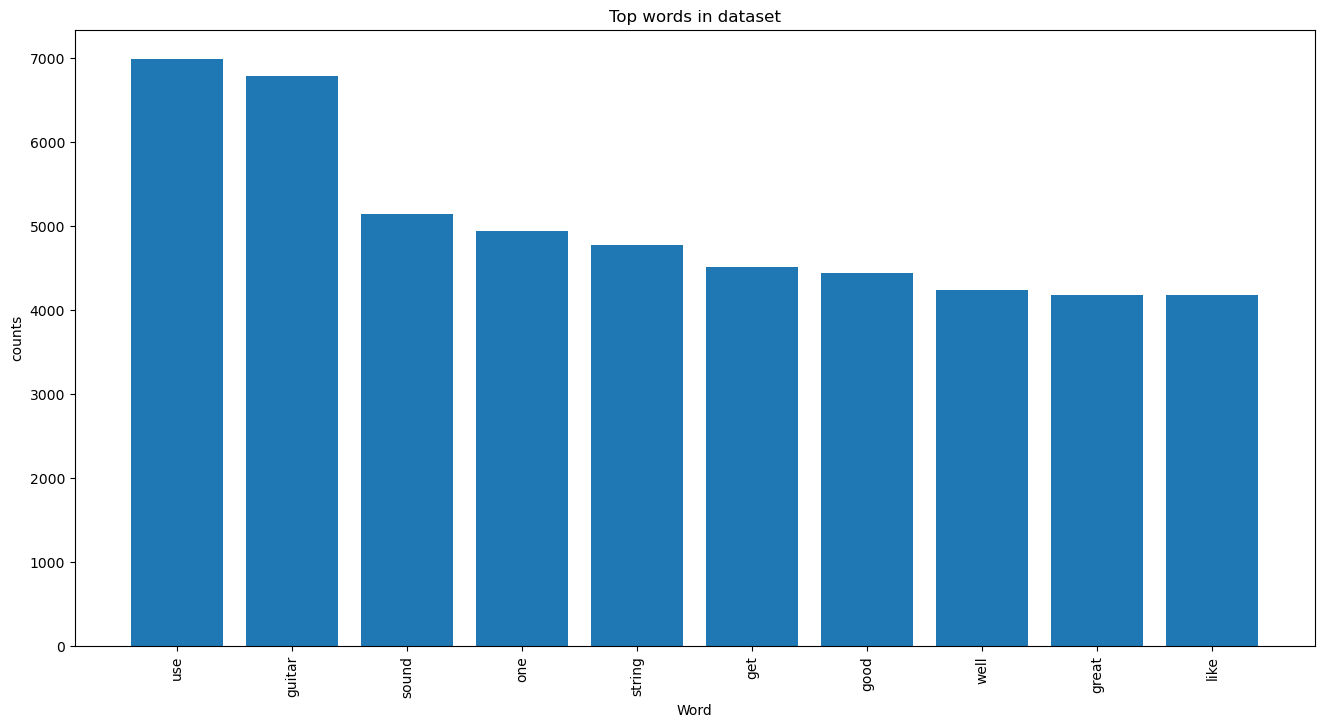

In [32]:
count_vectorizer = CountVectorizer()#max_df = 0.20,min_df = 0.01)
words, word_values = get_top_n_words(n_top_words=10,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=reindexed_data)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in dataset');
ax.set_xlabel('Word');
ax.set_ylabel('counts');
plt.show()

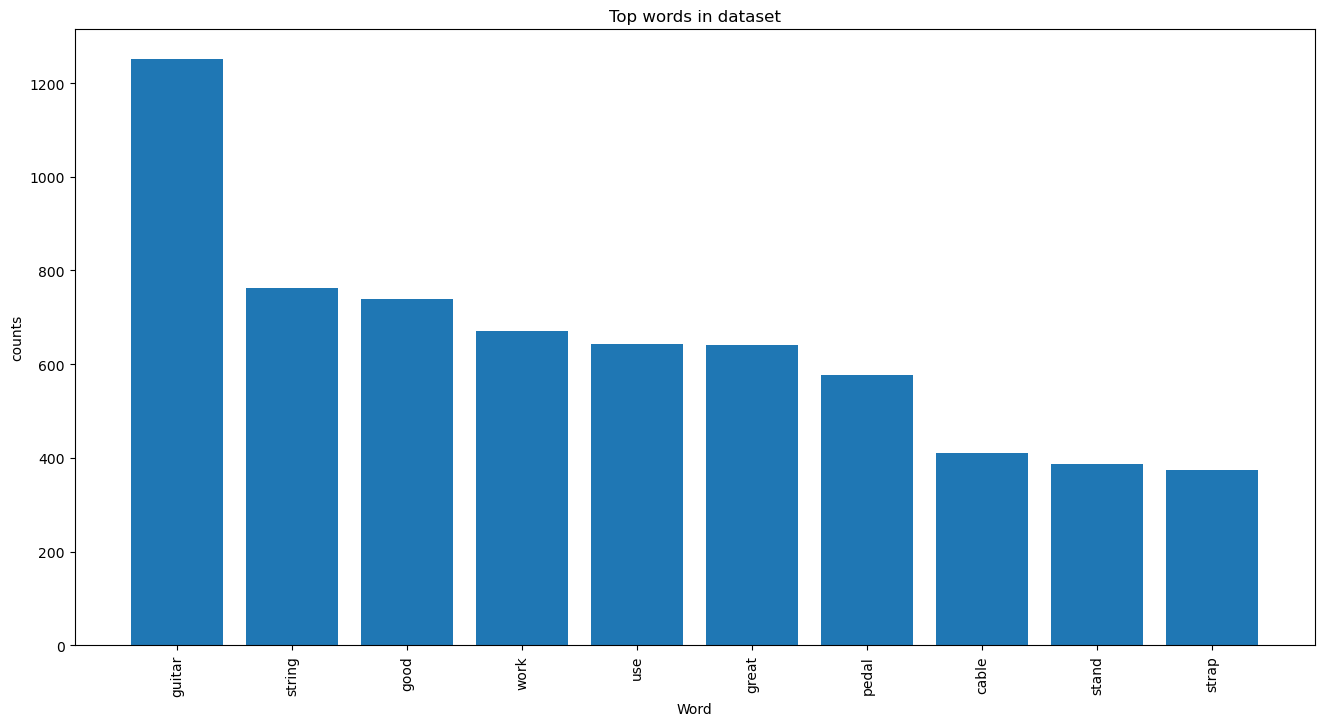

In [33]:
count_vectorizer = CountVectorizer()#max_df = 0.20,min_df = 0.01)
words, word_values = get_top_n_words(n_top_words=10,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=data_01)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in dataset');
ax.set_xlabel('Word');
ax.set_ylabel('counts');
plt.show()

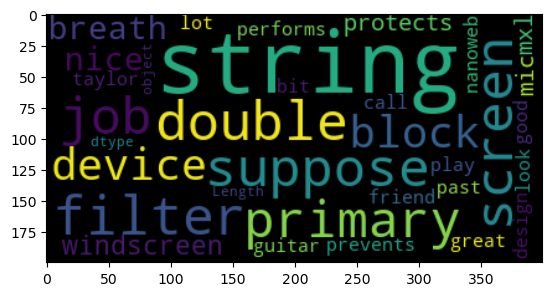

In [34]:
text = str(data_01)

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

## 2.1 Modelling
After the first analysis and EDA we can start the modelling process.

2.1 preprocessing

For the selection of the max_features number in the CountVectorizer function i choose the mean value.

In [35]:
count_vectorizer = CountVectorizer()#max_df = 0.20, min_df = 0.01)
words, word_values = get_top_n_words(n_top_words=4013,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=data_01)
statistics.mean(word_values)
max_feature_words = sum(i >= statistics.mean(word_values) for i in word_values)

In [36]:
count_vectorizer = CountVectorizer(max_features=max_feature_words)
text_sample = data_01.sample(n=len(data_01), random_state=0).values
term_matrix = count_vectorizer.fit_transform(text_sample.astype(str))

In [37]:
n_topics = 5

### 2.2 Latent Semantic Analysis

2.2.1 preprocessing

In [38]:
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(term_matrix)

In [39]:
# Define helper functions
def get_keys(topic_matrix):
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [40]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [41]:
# Define helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

2.2.2 show top n (in this case:5) wordpairs

In [42]:
top_n_words_lsa = get_top_n_words(5, lsa_keys, term_matrix, count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  guitar strap stand tuner year
Topic 2:  good cable quality price product
Topic 3:  string addario ball use acoustic
Topic 4:  work pedal use easy amp
Topic 5:  great sound little price product


2.2.3 show the distribution of the top n word-pairs

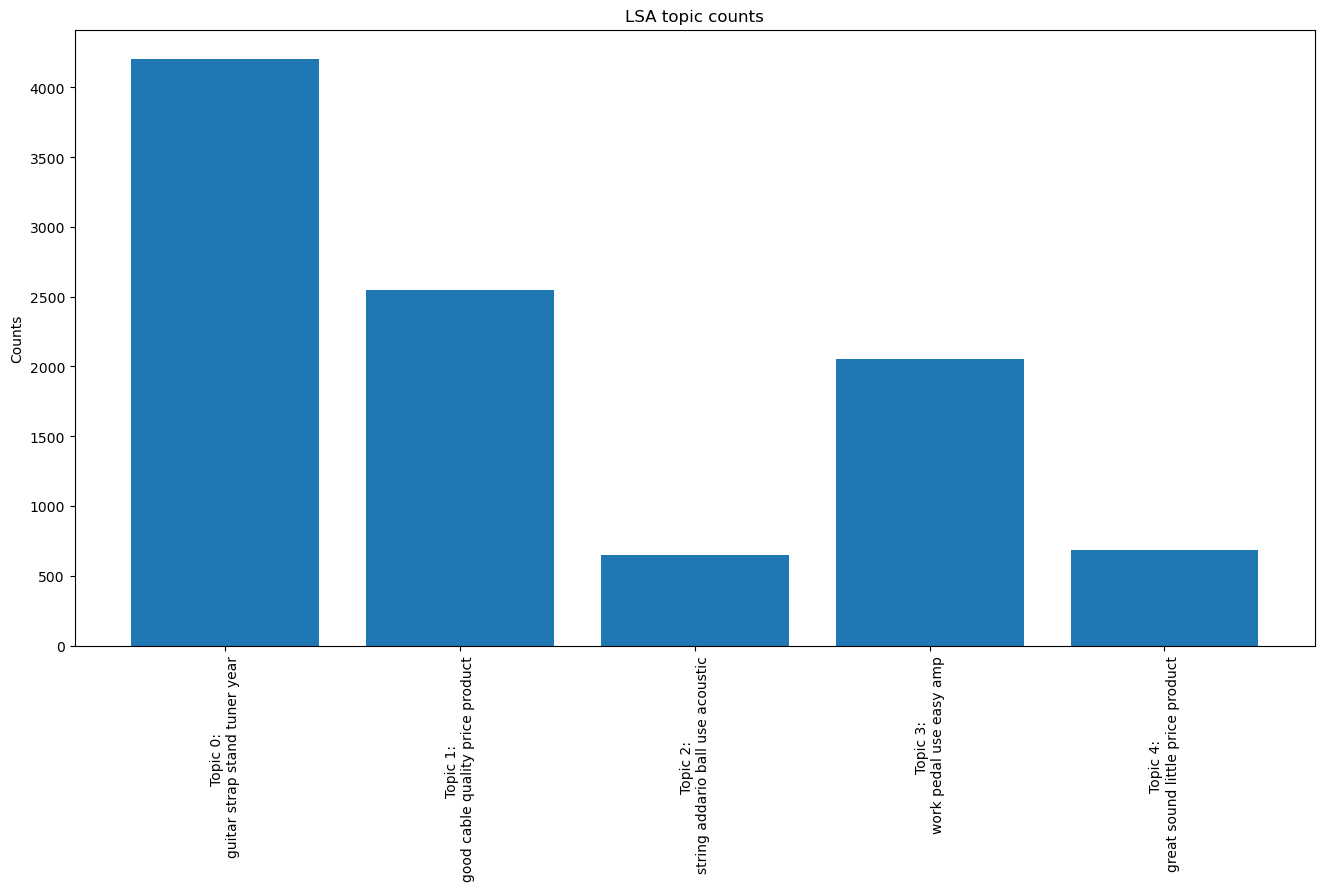

In [43]:
top_n_words = get_top_n_words(5, lsa_keys, term_matrix, count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_n_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels, rotation='vertical');
ax.set_ylabel('Counts');
ax.set_title('LSA topic counts');
plt.show()

2.2.4 To visualize the clustering process i use the t-SNE technique

In [44]:
tsne_lsa_model = TSNE(n_components=2, perplexity=30, learning_rate="auto", 
                        n_iter=1000, verbose=0, random_state=0, angle=0.5)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [45]:
# Define helper functions
def get_mean_topic_vectors(keys, two_dim_vectors):
    mean_topic_vectors = []
    for t in range(n_topics):
        words_in_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                words_in_topic.append(two_dim_vectors[i])    
        
        words_in_topic = np.vstack(words_in_topic)
        mean_word_in_topic = np.mean(words_in_topic, axis=0)
        mean_topic_vectors.append(mean_word_in_topic)
    return mean_topic_vectors

In [46]:
# Define colormap
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [47]:
top_words_lsa = get_top_n_words(5, lsa_keys, term_matrix, count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

### 2.3 Latent Dirichilet Allocation
Now im repeating the procedure but with the LDA Method.

In [48]:
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(term_matrix)

In [49]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [50]:
top_n_words_lda = get_top_n_words(5, lda_keys, term_matrix, count_vectorizer)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  cable time guitar bass good
Topic 2:  string pedal great work guitar
Topic 3:  tuner amp good thing guitar
Topic 4:  guitar stand year nice mic
Topic 5:  strap good quality guitar need


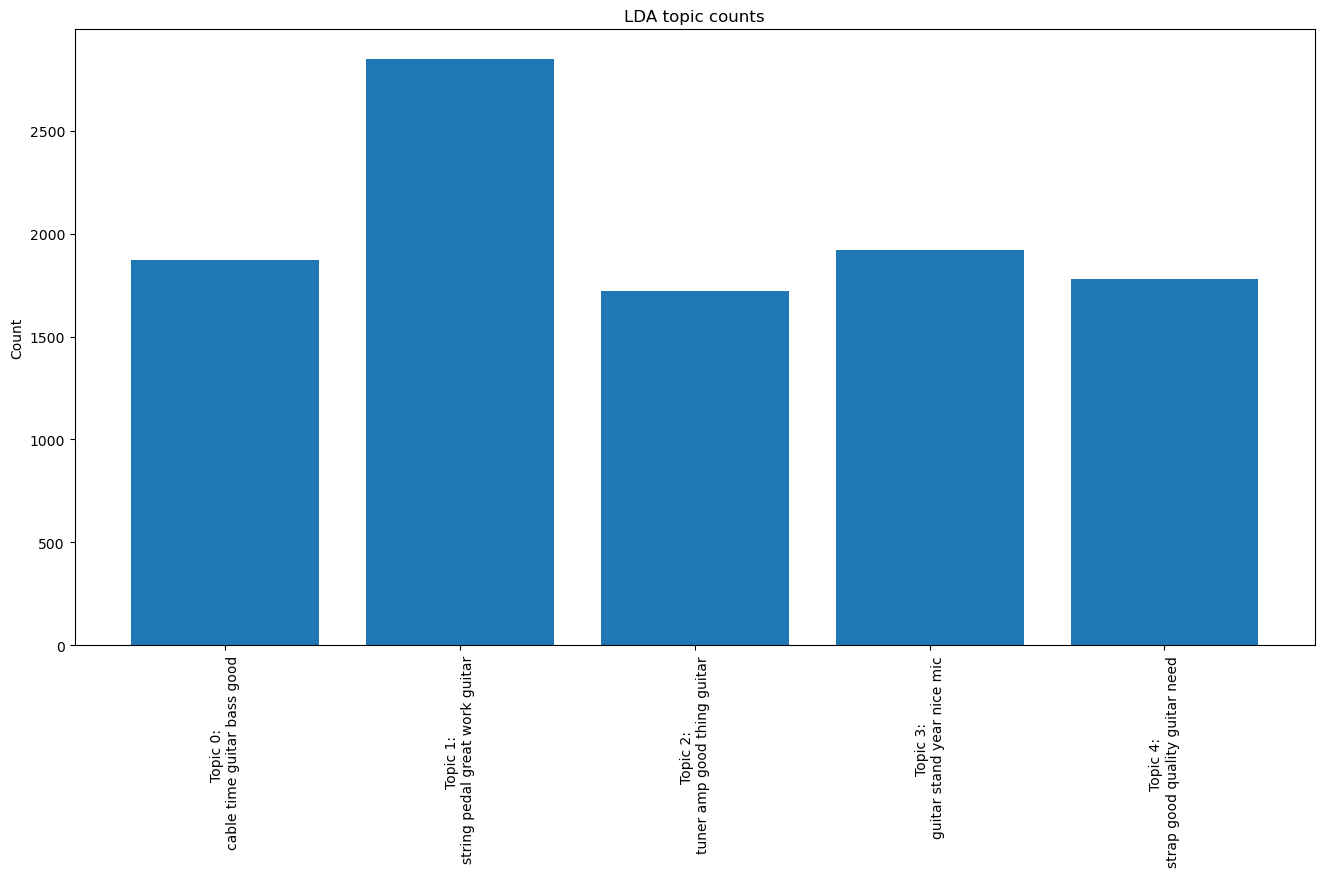

In [51]:
top_n_words = get_top_n_words(5, lda_keys, term_matrix, count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_n_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_xticklabels(labels, rotation='vertical');
ax.set_title('LDA topic counts');
ax.set_ylabel('Count');

In [52]:
tsne_lda_model = TSNE(n_components=2, perplexity=30, learning_rate="auto", 
                        n_iter=1000, verbose=0, random_state=0, angle=0.5)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [53]:
top_n_words_lda = get_top_n_words(5, lda_keys, term_matrix, count_vectorizer)
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
                  text=top_n_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)

## 3.0 TF-IDF with pyLDAvis visualization

In this Chapter i used another method. I used the tf-idf vectorizer and it´s including data cleaning methods. After the EDA and modelling i used the pyLDAvis package to analyse the method in a user friendly way.

In [54]:
from __future__ import print_function
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.20, 
                                min_df = 0.01)
    
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(raw_data['reviewText'].values.astype('U'))

/opt/conda/lib/python3.7/site-packages/past/types/oldstr.py:36: DeprecationWarning: invalid escape sequence \d
  """
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:2032: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning,


In [55]:
lda_tfidf = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(learning_method='online', n_components=5,
                          random_state=0)

In [56]:
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/pyLDAvis/_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.037746 -0.061369       1        1  34.711671
1     -0.101264 -0.121456       2        1  30.994492
2     -0.143091 -0.042120       3        1  17.253573
3     -0.080596  0.230614       4        1  10.463589
4      0.362697 -0.005669       5        1   6.576676, topic_info=        Term        Freq       Total Category  logprob  loglift
461    stand  330.000000  330.000000  Default  30.0000  30.0000
291      mic  301.000000  301.000000  Default  29.0000  29.0000
474    strap  264.000000  264.000000  Default  28.0000  28.0000
476   string  491.000000  491.000000  Default  27.0000  27.0000
337    pedal  351.000000  351.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
397   record   63.389470  139.646347   Topic5  -3.6228   1.9318
386  quickly   28.504634   63.361497   Topic5  -4.4221   1.9229
90      clip   45.358276  104.922304   Topic5  -3.9575   1.8830
419      say   31.064909  213.137736   Topic5  -4.3361   0.7958
46      best   25.458199  157.198250   Topic5  -4.5351   0.9012

[279 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1         1  0.234649  absolutely
1         2  0.187719  absolutely
1         5  0.586623  absolutely
2         1  0.014696    accurate
2         2  0.969961    accurate
...     ...       ...         ...
558       1  0.973758         xlr
559       1  0.305510        year
559       2  0.585020        year
559       3  0.078003        year
559       4  0.026001        year

[502 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5])